In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os, sys

In [4]:
folder = 'C:\\Users\\Kendall\\Documents\\machine-learning\\drivendata.org_projects\\undp_mdg'
data_file = 'TrainingSet.csv'
file_path = os.path.join(folder, data_file)

In [5]:
file_path

'C:\\Users\\Kendall\\Documents\\machine-learning\\drivendata.org_projects\\undp_mdg\\TrainingSet.csv'

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          195402 non-null  int64  
 1   pred           195402 non-null  bool   
 2   1972 [YR1972]  64945 non-null   float64
 3   1973 [YR1973]  64443 non-null   float64
 4   1974 [YR1974]  64966 non-null   float64
 5   1975 [YR1975]  66973 non-null   float64
 6   1976 [YR1976]  67717 non-null   float64
 7   1977 [YR1977]  69735 non-null   float64
 8   1978 [YR1978]  69763 non-null   float64
 9   1979 [YR1979]  69906 non-null   float64
 10  1980 [YR1980]  75250 non-null   float64
 11  1981 [YR1981]  78034 non-null   float64
 12  1982 [YR1982]  79016 non-null   float64
 13  1983 [YR1983]  78982 non-null   float64
 14  1984 [YR1984]  79532 non-null   float64
 15  1985 [YR1985]  81017 non-null   float64
 16  1986 [YR1986]  81455 non-null   float64
 17  1987 [YR1987]  82752 non-null

### Count of null cells by column/year

In [8]:
data.isnull().sum()

index                 0
pred                  0
1972 [YR1972]    130457
1973 [YR1973]    130959
1974 [YR1974]    130436
1975 [YR1975]    128429
1976 [YR1976]    127685
1977 [YR1977]    125667
1978 [YR1978]    125639
1979 [YR1979]    125496
1980 [YR1980]    120152
1981 [YR1981]    117368
1982 [YR1982]    116386
1983 [YR1983]    116420
1984 [YR1984]    115870
1985 [YR1985]    114385
1986 [YR1986]    113947
1987 [YR1987]    112650
1988 [YR1988]    112160
1989 [YR1989]    109071
1990 [YR1990]     88447
1991 [YR1991]     88411
1992 [YR1992]     83159
1993 [YR1993]     80849
1994 [YR1994]     78579
1995 [YR1995]     70934
1996 [YR1996]     71028
1997 [YR1997]     69716
1998 [YR1998]     69458
1999 [YR1999]     64522
2000 [YR2000]     54855
2001 [YR2001]     58619
2002 [YR2002]     55087
2003 [YR2003]     56243
2004 [YR2004]     53023
2005 [YR2005]     33858
2006 [YR2006]     36514
2007 [YR2007]     33806
YRAVG                 0
YRSTD                 0
Country Name          0
Series Code     

In [9]:
mdg_series = ['1.2','2.1','3.2','4.1','5.1','6.1','6.7','7.8','8.16']

### Descemding order of data series by year

In [10]:
data[data['Series Code'].isin(mdg_series)].isnull().sum()

index               0
pred                0
1972 [YR1972]    1240
1973 [YR1973]    1240
1974 [YR1974]    1242
1975 [YR1975]    1233
1976 [YR1976]    1224
1977 [YR1977]    1217
1978 [YR1978]    1209
1979 [YR1979]    1207
1980 [YR1980]    1205
1981 [YR1981]    1186
1982 [YR1982]    1186
1983 [YR1983]    1180
1984 [YR1984]    1167
1985 [YR1985]    1166
1986 [YR1986]    1160
1987 [YR1987]    1160
1988 [YR1988]    1152
1989 [YR1989]    1156
1990 [YR1990]     596
1991 [YR1991]     768
1992 [YR1992]     734
1993 [YR1993]     712
1994 [YR1994]     659
1995 [YR1995]     590
1996 [YR1996]     552
1997 [YR1997]     570
1998 [YR1998]     534
1999 [YR1999]     473
2000 [YR2000]     420
2001 [YR2001]     439
2002 [YR2002]     434
2003 [YR2003]     419
2004 [YR2004]     420
2005 [YR2005]     393
2006 [YR2006]     382
2007 [YR2007]     404
YRAVG               0
YRSTD               0
Country Name        0
Series Code         0
Series Name         0
dtype: int64

### Checking top 25 countries in terms of count of data series included in the data file

In [11]:
data.groupby('Country Name').agg({'Series Code': 'size'}).sort_values(by='Series Code', ascending=False).head(25)

,Series Code
Country Name,
Bolivia,1255
Bangladesh,1242
India,1240
Sri Lanka,1239
Kyrgyz Republic,1236
Philippines,1236
Ghana,1233
Morocco,1233
Kenya,1232


### Checking how many data series each country has

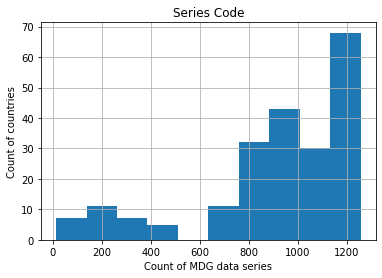

In [363]:
data.groupby('Country Name').agg({'Series Code': 'size'}).sort_values(by='Series Code', ascending=False).hist()
plt.xlabel('Count of MDG data series')
plt.ylabel('Count of countries')
plt.show()

### Distribution of average progress towards MDG index

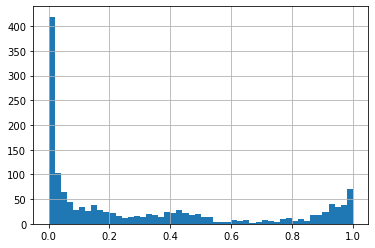

In [13]:
data[(data['Series Code'].isin(mdg_series))]['YRAVG'].hist(bins=50)
plt.show()

### Distribution of average arable land in hectacres

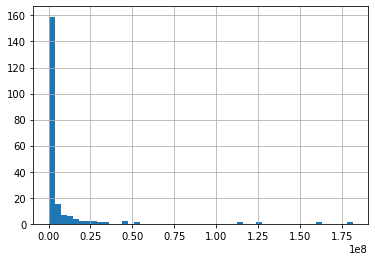

In [14]:
data[(data['Series Code']=='AG.LND.ARBL.HA')]['YRAVG'].hist(bins=50)
plt.show()

### Distribution of global crop production index

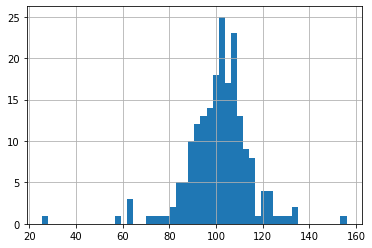

In [15]:
data[(data['Series Code']=='AG.PRD.CROP.XD')]['2007 [YR2007]'].hist(bins=50)
plt.show()

### Hypothesize a "linear' correlation between consecutive years

In [16]:
corr = data.corr()

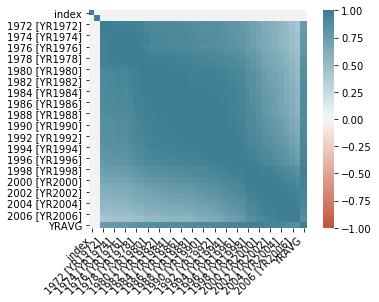

In [17]:
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Notice from above that there is a very positive correlation between adjacent or neighboring years, but there is also a lot of null or 0 data provided, therefore this is likely false positive of any significant correlation.

In [580]:
year_cols = [col for col in data.columns if '[YR' in col]
print(year_cols)

['1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]', '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]', '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]', '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]']


### Backfill NAs or drop rows with too much missing data

In [19]:
def bfill_ffill_func(row):
    new_row = row[year_cols].bfill().ffill()
    return new_row

# this is inefficient way to perform this task, as it runs O(nm), where n is rows and m is columns (quadratic)

In [55]:
# data[year_cols] = data.apply(bfill_ffill_func, axis=1)


In [56]:
data.head()

,index,pred,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],YRAVG,YRSTD,Country Name,Series Code,Series Name
0,16,False,NaN,NaN,0.267007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.273308,0.008910748,Afghanistan,2.1,Achieve universal primary education
1,1186,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1780,0.185,0.2590,0.1800,0.1760,0.195000,0.031874755,Afghanistan,3.2,Promote gender equality and empower women
2,753,True,0.296,0.2909,0.285200,0.2798,0.2742,0.2683,0.2624,0.2565,...,0.1244,0.121,0.1177,0.1145,0.1115,0.191769,0.060006118,Afghanistan,4.1,Reduce child mortality
3,706,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.016000,NOT ENOUGH DATA,Afghanistan,5.1,Improve maternal health
4,1030,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0010,0.001,0.0010,0.0010,0.0010,0.001000,4.46254E-19,Afghanistan,6.1,Combat HIV/AIDS


In [ ]:
def bfill_array(array):
    out = array.copy()
    for row_idx in range(array.shape[0]):
        for col_idx in range(array.shape[1]):
            if np.isnan(array[row_idx][col_idx]):
                array[row_idx][col_idx] = array[row_idx][col_idx - 1]
    return out

In [ ]:
data_array = data[year_cols].values
new_years = bfill_array(data_array)
new_years[0:5]

# this ran in significantly less time

In [58]:
data2 = data.copy()
data2[year_cols] = new_years

In [61]:
data2.head()

,index,pred,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],YRAVG,YRSTD,Country Name,Series Code,Series Name
0,16,False,0.267007,0.267007,0.267007,0.279609,0.279609,0.279609,0.279609,0.279609,...,0.279609,0.279609,0.279609,0.279609,0.279609,0.273308,0.003483,Afghanistan,2.1,Achieve universal primary education
1,1186,False,0.192000,0.192000,0.192000,0.192000,0.192000,0.192000,0.192000,0.192000,...,0.178000,0.185000,0.259000,0.180000,0.176000,0.195000,0.011932,Afghanistan,3.2,Promote gender equality and empower women
2,753,True,0.296000,0.290900,0.285200,0.279800,0.274200,0.268300,0.262400,0.256500,...,0.124400,0.121000,0.117700,0.114500,0.111500,0.191769,0.059167,Afghanistan,4.1,Reduce child mortality
3,706,False,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,...,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.000000,Afghanistan,5.1,Improve maternal health
4,1030,True,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.000000,Afghanistan,6.1,Combat HIV/AIDS


In [55]:
def get_row_std(row):
    if row['YRSTD'] == 'NOT ENOUGH DATA':
        return np.std(row[year_cols])
    else:
        row['YRSTD']
        
# should be performing in O(n), but only returing 0 for first case, and NaN for second case

In [60]:
data2['YRSTD'] = data2.apply(lambda row: np.std(row[year_cols]), axis=1)

# lambda function taking a lot longer than rowise function 

In [62]:
data2.to_csv('experiment_backup.csv', index=False)

In [23]:
data2[data2['pred']==True].describe()

,index,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],YRAVG,YRSTD
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,142507.362280,0.279312,0.279161,0.278721,0.278114,0.277779,0.277266,0.277056,0.276720,0.276234,...,0.308729,0.315823,0.325592,0.332728,0.339726,0.345452,0.352755,0.361211,0.311534,0.039177
std,82711.218777,0.367048,0.367937,0.368318,0.368525,0.369310,0.369763,0.370816,0.371422,0.371990,...,0.381667,0.382592,0.384054,0.384911,0.386139,0.387078,0.388446,0.390645,0.371498,0.055070
min,559.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000170,0.000170,0.000100,0.000120,0.000060,0.000144,0.000000
25%,70277.000000,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,...,0.011800,0.013000,0.015379,0.015900,0.015500,0.017100,0.018000,0.018000,0.019025,0.005525
50%,142475.000000,0.054100,0.053000,0.050900,0.048000,0.045500,0.044400,0.043000,0.041100,0.040200,...,0.072815,0.083100,0.091494,0.098500,0.106294,0.113300,0.119922,0.123700,0.101944,0.018828
75%,213142.000000,0.616000,0.616000,0.619000,0.619000,0.619000,0.619000,0.616000,0.619000,0.619000,...,0.708000,0.711314,0.728400,0.763000,0.771000,0.780000,0.796600,0.802000,0.681111,0.047239
max,285811.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999702,0.999746,0.999751,0.999956,0.999657,0.999986,0.999762,0.999992,0.998000,0.320501


### Inspect the distribution of each series needed to predict for competition

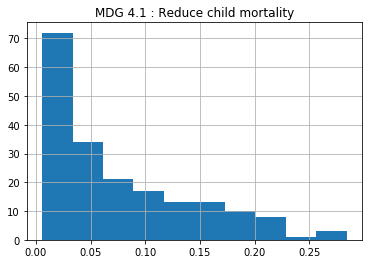

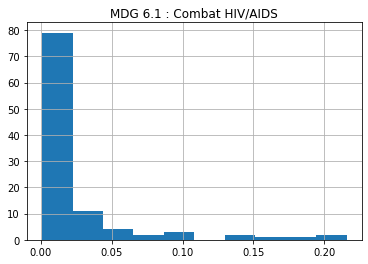

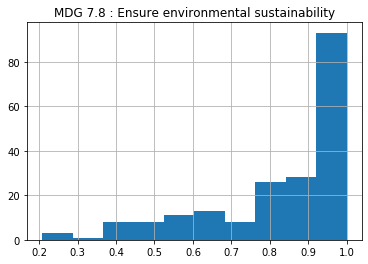

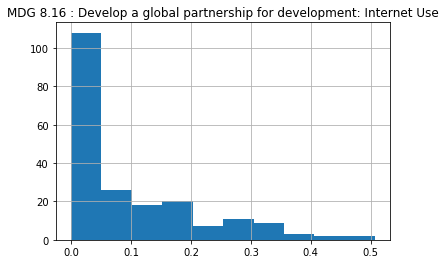

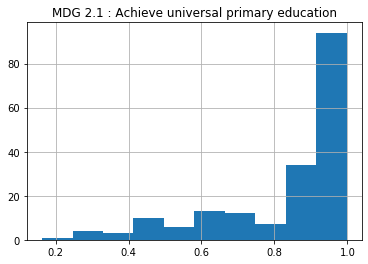

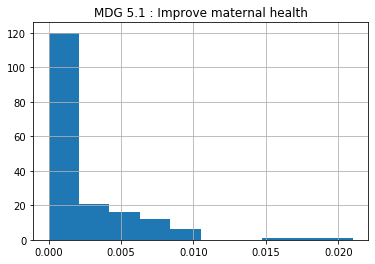

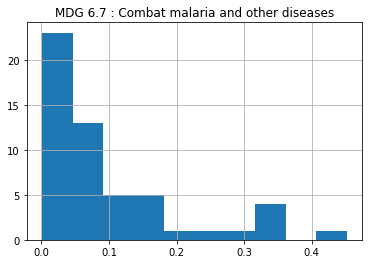

In [21]:
for series in data2[data2['pred']==True]['Series Code'].unique():
    temp_df = data2[data2['Series Code']==series]
    series_name = temp_df['Series Name'].unique()
    temp_df['YRAVG'].hist()
    plt.title(f'MDG {series} : {series_name[0]}')
    plt.show()

In [548]:
data2 = pd.read_csv('experiment_backup.csv')

In [549]:
index_lookup = {
    '2.1': 'Achieve universal primary education',
    '3.2':'Promote gender equality and empower women',
    '4.1':'Reduce child mortality',
    '5.1':'Improve maternal health',
    '6.1':'Combat HIV/AIDS',
    '7.8':'Ensure environmental sustainability',
    '8.16':'Develop a global partnership for development: Internet Use',
    '1.2':'Eradicate extreme poverty and hunger',
    '6.7':'Combat malaria and other diseases'
}

### Test some kind of clustering of countries based on series

### Create simple RNN architecture

In [550]:
import keras
from keras.layers import Flatten, Dense, Dropout, SimpleRNN, TimeDistributed, LSTM, RNN
from keras.metrics import mean_squared_error
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from keras import backend as K
import matplotlib.pyplot as plt

In [553]:
n_steps=5
series_data = data2[data2['Series Code'].isin(mdg_series)][year_cols].values

In [554]:
series_data = series_data.reshape(series_data.shape[0], series_data.shape[1], 1)

In [555]:
series_data.shape

(1441, 36, 1)

In [204]:
shuffled_data = shuffle(series_data)
mean_of_array = shuffled_data.mean(axis=0)
std_of_array = shuffled_data.std(axis=0)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shuffled_data)

In [252]:
scaled_data = scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1)

In [253]:
scaled_data.shape

(737, 36, 1)

In [606]:
X = series_data[:, :-1]
y = series_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [298]:
# X_train, y_train = scaled_data[:516, :n_steps, ], scaled_data[:516, -1, ]
# X_valid, y_valid = scaled_data[516:663, :n_steps, ], scaled_data[516:663, -1, ]
# X_test, y_test = scaled_data[663:, :n_steps,], scaled_data[663:, -1, ]

In [557]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(965, 35, 1) (965, 1) (476, 35, 1) (476, 1)


In [67]:
y_pred = y_pred.reshape(-1, 1)

In [166]:
y_test.shape

(74, 1)

In [167]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

AttributeError: 'DType' object has no attribute 'type'

In [110]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
#     print(f'freq1 {freq1}, freq2 {freq2}, offsets1 {offsets1}, offsets2 {offsets2}')
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series

In [150]:
test_series = generate_time_series(10000, n_steps+1)

In [151]:
type(test_series)

numpy.ndarray

In [153]:
test_series = test_series.reshape(test_series.shape[0], test_series.shape[1], 1)

In [154]:
test_series.shape

(10000, 6, 1)

In [187]:
X_train, y_train = test_series[:7000, :n_steps], test_series[:7000, -1]
X_valid, y_valid = test_series[7000:9000, :n_steps], test_series[7000:9000, -1]
X_test, y_test = test_series[9000:, n_steps], test_series[9000:, -1]

### Train model on timeseries data

In [605]:
K.clear_session()

In [369]:
simple_model = Sequential([
    Flatten(input_shape=[5, 1]),
    Dense(1)
])

In [370]:
simple_model = Sequential([
    SimpleRNN(1, input_shape=[None,1])
])

In [607]:
simple_model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=[None, 1]),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(1)
])

In [608]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 64)          4224      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 66        
Total params: 12,546
Trainable params: 12,546
Non-trainable params: 0
_________________________________________________________________


In [609]:
optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
simple_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [610]:
simple_history = simple_model.fit(X_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2)

Train on 772 samples, validate on 193 samples
Epoch 1/20
772/772 [==============================] - 1s 798us/step - loss: 0.1782 - mean_squared_error: 0.0888 - val_loss: 0.0790 - val_mean_squared_error: 0.0098
Epoch 2/20
772/772 [==============================] - 0s 314us/step - loss: 0.0583 - mean_squared_error: 0.0073 - val_loss: 0.0462 - val_mean_squared_error: 0.0046
Epoch 3/20
772/772 [==============================] - 0s 279us/step - loss: 0.0419 - mean_squared_error: 0.0039 - val_loss: 0.0298 - val_mean_squared_error: 0.0016
Epoch 4/20
772/772 [==============================] - 0s 292us/step - loss: 0.0319 - mean_squared_error: 0.0021 - val_loss: 0.0243 - val_mean_squared_error: 0.0013
Epoch 5/20
772/772 [==============================] - 0s 279us/step - loss: 0.0297 - mean_squared_error: 0.0018 - val_loss: 0.0354 - val_mean_squared_error: 0.0016
Epoch 6/20
772/772 [==============================] - 0s 289us/step - loss: 0.0257 - mean_squared_error: 0.0014 - val_loss: 0.0192 - v

### Assess model accuracy

In [611]:
simple_history

In [397]:
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)

In [396]:
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.legend()
# plt.show()

In [612]:
def plot_model_loss_history(simple_history):
    plt.plot(simple_history.history['mean_squared_error'], label='MSE (testing data)')
    plt.plot(simple_history.history['val_mean_squared_error'], label='MSE (validation data)')
    plt.title('MSE for 5 step prediction of MDGs')
    plt.ylabel('MSE value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()

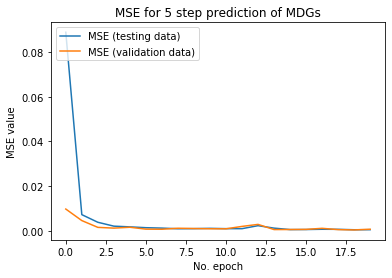

In [613]:
plot_model_loss_history(simple_history)

### Make predictions for 1 and 5 year windows

In [614]:
pred_df = data2[data2['Series Code'].isin(mdg_series)].copy()
model_years = year_cols.copy()


In [616]:
for i in range(5):
    year = 2007 + i + 1
    new_col_name = f'{year} [YR{year}]'
    pred_array = pred_df[model_years].values
    pred_array = pred_array.reshape(pred_array.shape[0], pred_array.shape[1], 1)
    pred_df[new_col_name] = simple_model.predict(pred_array)
    model_years.append(new_col_name)

In [617]:
pred_df[['index', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]']]

,index,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,16,0.279609,0.279609,0.279609,0.279609,0.279609,0.283416,0.262613,0.256129,0.241986,0.217472
1,1186,0.178000,0.185000,0.259000,0.180000,0.176000,0.203305,0.174531,0.145197,0.147787,0.119455
2,753,0.124400,0.121000,0.117700,0.114500,0.111500,0.120296,0.099645,0.080583,0.077103,0.037054
3,706,0.016000,0.016000,0.016000,0.016000,0.016000,-0.005787,-0.008891,-0.038774,-0.051836,-0.087279
4,1030,0.001000,0.001000,0.001000,0.001000,0.001000,-0.027197,-0.028337,-0.062167,-0.077315,-0.116371
...,...,...,...,...,...,...,...,...,...,...,...
194310,285487,0.005550,0.005550,0.005550,0.005550,0.007300,-0.019333,-0.020295,-0.052812,-0.067427,-0.105665
194311,285811,0.213000,0.198000,0.184000,0.173000,0.164000,0.157607,0.130231,0.111778,0.086560,0.060773
194312,286090,0.029000,0.029000,0.029000,0.029000,0.029000,0.012033,0.007369,-0.019572,-0.031040,-0.063984
194313,285340,0.796000,0.796000,0.797000,0.797000,0.797000,0.856394,0.861754,0.879089,0.891187,0.899934


In [418]:
pred_df.groupby(['Series Code']).agg({'Country Name': 'size'})

,Country Name
Series Code,
1.2,123
2.1,184
3.2,200
4.1,192
5.1,178
6.1,105
6.7,54
7.8,199
8.16,206


In [411]:
pred_df.to_csv('simple_rnn_pred.csv', index=False)

In [413]:
import seaborn as sb
from matplotlib.colors import LogNorm


In [429]:
year_list = []
base_year = 1972
next_year = 1972
i = 0
while next_year < 2012:
    next_year = base_year + i
    year_list.append(next_year)
    i += 1

In [481]:
def get_reshaped_dataframe(pred_df, series):
    reshaped_plot_data = []

    for country in pred_df[pred_df['Series Code']==series]['Country Name'].unique():
        print(f'Looking for MDG {series} data from {country}')
        for year in year_list:
            year_col = f'{year} [YR{year}]'
            country_series_year_dict = {}
            country_series_year_dict['country name'] = country
            country_series_year_dict['series year'] = year

            country_series_year_dict['series value'] = pred_df.loc[(pred_df['Country Name']==country) & (pred_df['Series Code']=='8.16')][year_col].values[0]
    #         country_series = pred_df[(pred_df['Country Name']==country) & (pred_df['Series Code']=='8.16')][model_years].values
    #         country_series_year_dict['series'] = country_series
            reshaped_plot_data.append(country_series_year_dict)
    new_df = pd.DataFrame(reshaped_plot_data)
    print(new_df.info())
    return new_df

In [618]:
new_df = pd.DataFrame(reshaped_plot_data)

In [619]:
new_df.head()

,country name,series year,series value
0,Afghanistan,1972,0.0
1,Afghanistan,1973,0.0
2,Afghanistan,1974,0.0
3,Afghanistan,1975,0.0
4,Afghanistan,1976,0.0


In [620]:
def display_series_lineplot(df, series):
    plt.figure(figsize=(20,10))
    for country in df['country name'].unique():
        country_df = df[df['country name']==country]
        sb.lineplot(x="series year", y="series value", data=country_df)

    plt.title(f'{index_lookup[series]}')
    plt.show()

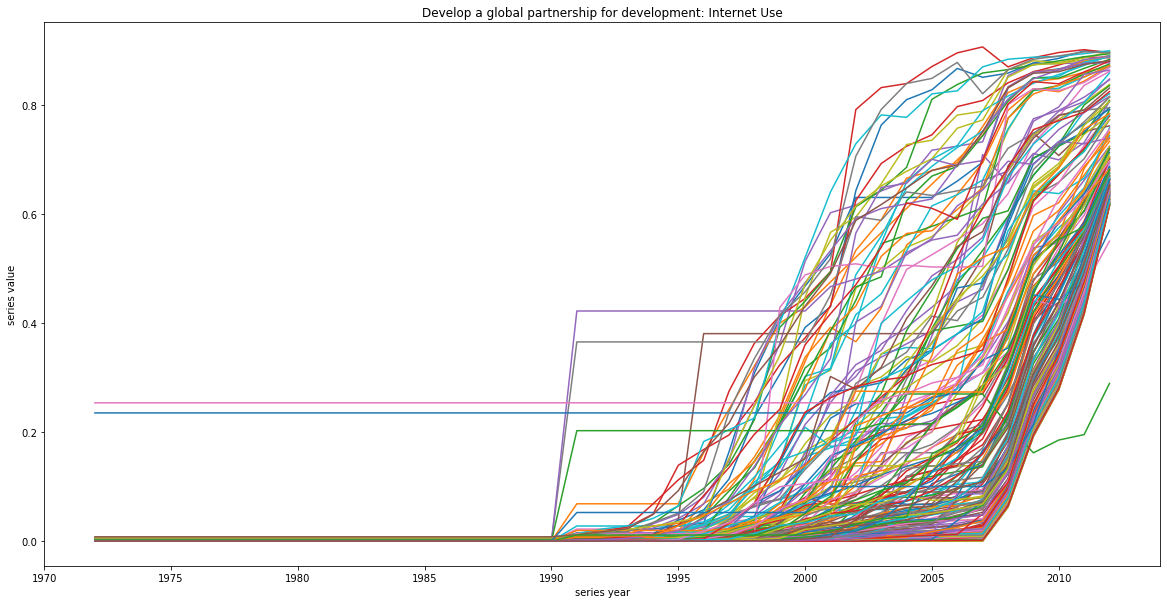

In [621]:
display_series_lineplot(new_df, '8.16')

### Model Iteration using LSTM with TimeDistribution

In [625]:
K.clear_session()

In [626]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=[None, 1]),
    Dropout(rate=0.2),
    LSTM(64, return_sequences=True),
    Dropout(rate=0.2),
    TimeDistributed(Dense(1))
])

In [627]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1)           65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [629]:
optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
lstm_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [630]:
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_lstm = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
y_test_lstm = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)

In [631]:
print(X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape, y_test_lstm.shape)

(965, 35, 1) (476, 35, 1) (965, 1, 1) (476, 1, 1)


In [632]:
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm,
    batch_size=64,
    epochs=20,
    validation_data=(X_test_lstm, y_test_lstm))

Exception ignored in: <function BaseSession._Callable.__del__ at 0x0000021348620D38>
Traceback (most recent call last):
  File "C:\Users\Kendall\Anaconda3\envs\geo_env\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Kendall\Anaconda3\envs\geo_env\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 2281821838776


Train on 965 samples, validate on 476 samples
Epoch 1/20
965/965 [==============================] - 1s 1ms/step - loss: 0.1920 - mean_squared_error: 0.0918 - val_loss: 0.1451 - val_mean_squared_error: 0.0595
Epoch 2/20
965/965 [==============================] - 1s 735us/step - loss: 0.1223 - mean_squared_error: 0.0466 - val_loss: 0.1085 - val_mean_squared_error: 0.0431
Epoch 3/20
965/965 [==============================] - 1s 716us/step - loss: 0.1080 - mean_squared_error: 0.0392 - val_loss: 0.0988 - val_mean_squared_error: 0.0363
Epoch 4/20
965/965 [==============================] - 1s 711us/step - loss: 0.1017 - mean_squared_error: 0.0356 - val_loss: 0.0968 - val_mean_squared_error: 0.0359
Epoch 5/20
965/965 [==============================] - 1s 718us/step - loss: 0.0977 - mean_squared_error: 0.0339 - val_loss: 0.0903 - val_mean_squared_error: 0.0328
Epoch 6/20
965/965 [==============================] - 1s 765us/step - loss: 0.0948 - mean_squared_error: 0.0322 - val_loss: 0.0880 - val

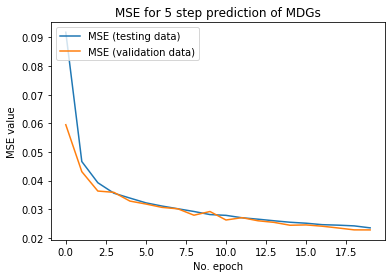

In [633]:
plot_model_loss_history(lstm_history)

In [634]:
year_cols

['1972 [YR1972]',
 '1973 [YR1973]',
 '1974 [YR1974]',
 '1975 [YR1975]',
 '1976 [YR1976]',
 '1977 [YR1977]',
 '1978 [YR1978]',
 '1979 [YR1979]',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]']

In [676]:
lstm_pred_df = data2[data2['Series Code'].isin(mdg_series)].copy()
model_years = year_cols.copy()

In [677]:
for i in range(5):
    year = 2007 + i + 1
    new_col_name = f'{year} [YR{year}]'
    print(f'Predicting values for {year} stored in column {new_col_name}')
    
    pred_array = lstm_pred_df[model_years].values
    pred_array = pred_array.reshape(pred_array.shape[0], pred_array.shape[1], 1)
    print(f'Shape of new array to predict values has shape {pred_array.shape}')
    
    pred_output = lstm_model.predict(pred_array)
    print(f'Predicted output has shape {pred_output.shape}')
        
    lstm_pred_df[new_col_name] = pred_output[:, -1, :]
    
    model_years.append(new_col_name)

Predicting values for 2008 stored in column 2008 [YR2008]
Shape of new array to predict values has shape (1441, 36, 1)
Predicted output has shape (1441, 36, 1)
Predicting values for 2009 stored in column 2009 [YR2009]
Shape of new array to predict values has shape (1441, 37, 1)
Predicted output has shape (1441, 37, 1)
Predicting values for 2010 stored in column 2010 [YR2010]
Shape of new array to predict values has shape (1441, 38, 1)
Predicted output has shape (1441, 38, 1)
Predicting values for 2011 stored in column 2011 [YR2011]
Shape of new array to predict values has shape (1441, 39, 1)
Predicted output has shape (1441, 39, 1)
Predicting values for 2012 stored in column 2012 [YR2012]
Shape of new array to predict values has shape (1441, 40, 1)
Predicted output has shape (1441, 40, 1)


In [678]:
lstm_df = get_reshaped_dataframe(lstm_pred_df, '8.16')

Looking for MDG 8.16 data from Afghanistan
Looking for MDG 8.16 data from Albania
Looking for MDG 8.16 data from Algeria
Looking for MDG 8.16 data from American Samoa
Looking for MDG 8.16 data from Andorra
Looking for MDG 8.16 data from Angola
Looking for MDG 8.16 data from Antigua and Barbuda
Looking for MDG 8.16 data from Argentina
Looking for MDG 8.16 data from Armenia
Looking for MDG 8.16 data from Aruba
Looking for MDG 8.16 data from Australia
Looking for MDG 8.16 data from Austria
Looking for MDG 8.16 data from Azerbaijan
Looking for MDG 8.16 data from Bahamas, The
Looking for MDG 8.16 data from Bahrain
Looking for MDG 8.16 data from Bangladesh
Looking for MDG 8.16 data from Barbados
Looking for MDG 8.16 data from Belarus
Looking for MDG 8.16 data from Belgium
Looking for MDG 8.16 data from Belize
Looking for MDG 8.16 data from Benin
Looking for MDG 8.16 data from Bermuda
Looking for MDG 8.16 data from Bhutan
Looking for MDG 8.16 data from Bolivia
Looking for MDG 8.16 data from B

Looking for MDG 8.16 data from Virgin Islands (U.S.)
Looking for MDG 8.16 data from West Bank and Gaza
Looking for MDG 8.16 data from Yemen, Rep.
Looking for MDG 8.16 data from Zambia
Looking for MDG 8.16 data from Zimbabwe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country name  8446 non-null   object 
 1   series year   8446 non-null   int64  
 2   series value  8446 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 198.1+ KB
None


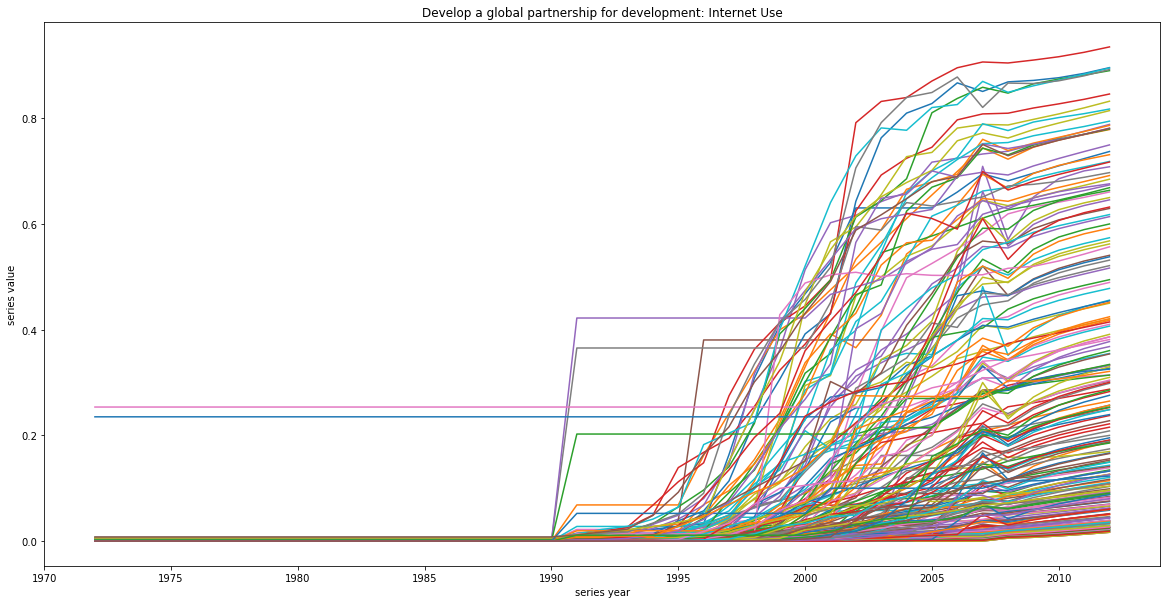

In [679]:
display_series_lineplot(lstm_df, '8.16')

In [681]:
lstm_pred_df.to_csv('lstm_rnn_pred.csv', index=False)